# Understanding Long Short-Term Memory (LSTM)

When dealing with sequential data, such as sentences of text, audio, or music, **Recurrent Neural Networks (RNNs)** work well. Unfortunately, during training, the gradients in RNNs can either explode or vanish, leading to difficulties in learning long-term dependencies. 

To address this issue, we use **Long Short-Term Memory (LSTM)** networks. Unlike standard RNNs, LSTMs have two separate connections to manage long-term and short-term information. This design helps in maintaining a more stable learning process.

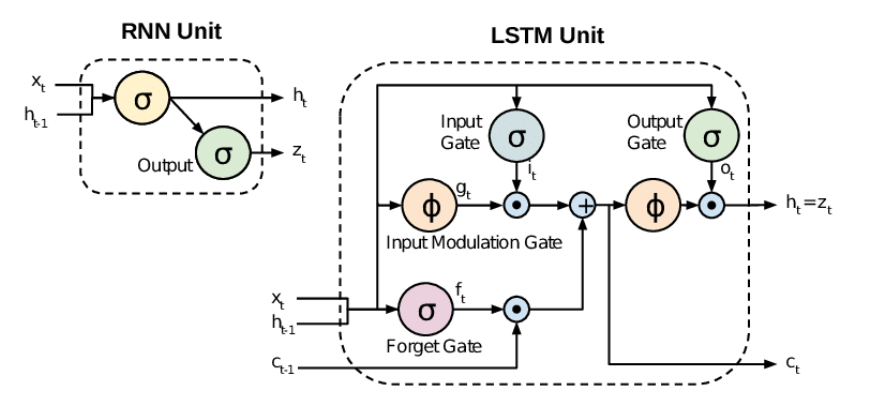

*Image from Data Science Duniya*

### Key Components of an LSTM Unit

1. **Forget Gate:** Determines what percentage of the Long-Term Memory is retained.
2. **Input Gate:** Combines Short-Term Memory with the input to create a Potential Long-Term Memory.
3. **Output Gate:** Responsible for updating the Short-Term Memory. The New Short-Term Memory is also the output of the entire LSTM unit.

By using these gates, LSTMs can effectively manage long-term dependencies, making them more robust for tasks involving sequential data.


# Preprocessing

We will be using a file that combines some lyrics of Eminem, which can be found in this dataset: [Eminem Lyrics from All Albums](https://www.kaggle.com/datasets/thaddeussegura/eminem-lyrics-from-all-albums).


### Reading File

In [1]:

def read_file(filepath):
    
    with open(filepath, encoding='utf-8') as f:
        str_text = f.read()
    
    return str_text

In [2]:
doc = read_file('combined_lyrics.txt')

### Cleaning Text - Separating Punctuation

In [3]:
import spacy
nlp = spacy.load('en_core_web_lg',disable=['parser', 'tagger','ner'])

nlp.max_length = 1340242 

In [4]:
len(nlp.vocab)

1340242

In [5]:
def separate_punct(doc):
    return [token.text.lower() for token in nlp(doc) if token.text not in '\n\n \n\n\n!"-#$%&()--.*+,-/:;<=>?@[\\]^_`{|}~\t\n ']

In [6]:
tokens = separate_punct(doc)


We will organize the data in sequences of 50 tokens and try to generate the 51th word.

In [7]:
# organize into sequences of tokens
train_len = 50+1 # 50 training words , then one target word

# Empty list of sequences
text_sequences = []

for i in range(train_len, len(tokens)):
    
    # Grab train_len# amount of characters
    seq = tokens[i-train_len:i]
    
    # Add to list of sequences
    text_sequences.append(seq)

You can see how we separated the text_sequences below

In [8]:
' '.join(text_sequences[0])

"\ufefftoo late for the other side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i"

In [9]:
' '.join(text_sequences[1])

"late for the other side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do"

In [10]:
' '.join(text_sequences[2])

"for the other side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't"

In [11]:
' '.join(text_sequences[3])

"the other side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't think"

In [12]:
' '.join(text_sequences[4])

"other side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't think she"

In [13]:
' '.join(text_sequences[5])

"side caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't think she understands"

In [14]:
' '.join(text_sequences[6])

"caught in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't think she understands the"

In [15]:
' '.join(text_sequences[7])

"in a chase 25 to life too late for the other side caught in a chase 25 to life eminem yeah too late eminem i ca n't keep chasing 'em i 'm taking my life back caught in a chase 25 to life i do n't think she understands the sacrifices"

In [16]:
len(text_sequences)

13632

### Tokenization with Keras

Converting text into numerical representantion so the neural network can understand do the math.

In [120]:
from keras.preprocessing.text import Tokenizer

# For better display, we will ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [18]:
tokenizer = Tokenizer()

# builds a vocabulary of all unique words of the file.
tokenizer.fit_on_texts(text_sequences)

# create sequence of integer ID based on the created vocab
sequences = tokenizer.texts_to_sequences(text_sequences)

In [19]:
# This is the dictionary
tokenizer.index_word

{1: 'i',
 2: 'you',
 3: 'the',
 4: 'a',
 5: 'and',
 6: 'to',
 7: "'s",
 8: 'it',
 9: 'in',
 10: "n't",
 11: 'that',
 12: "'m",
 13: 'of',
 14: 'my',
 15: 'me',
 16: 'your',
 17: 'but',
 18: "'",
 19: 'be',
 20: 'do',
 21: 'like',
 22: 'we',
 23: 'this',
 24: 'just',
 25: 'with',
 26: 'on',
 27: 'he',
 28: 'for',
 29: 'all',
 30: 'so',
 31: 'up',
 32: 'is',
 33: "'re",
 34: 'when',
 35: 'was',
 36: 'back',
 37: 'what',
 38: 'can',
 39: 'they',
 40: 'no',
 41: 'go',
 42: 'get',
 43: 'out',
 44: "'ll",
 45: 'got',
 46: 'ai',
 47: "'cause",
 48: 'shit',
 49: 'there',
 50: 'not',
 51: 'now',
 52: 'at',
 53: 'da',
 54: 'if',
 55: 'one',
 56: 'his',
 57: 'think',
 58: 'make',
 59: 'see',
 60: 'an',
 61: 'how',
 62: 'from',
 63: 'come',
 64: 'him',
 65: 'her',
 66: 'doing',
 67: 'have',
 68: 'here',
 69: 'bitch',
 70: 'time',
 71: 'then',
 72: '..',
 73: 'she',
 74: 'know',
 75: 'why',
 76: 'off',
 77: 'bad',
 78: "'em",
 79: 'eminem',
 80: 'good',
 81: 'over',
 82: 'as',
 83: 'dum',
 84: 'tak

In [20]:
tokenizer.word_counts


OrderedDict([('\ufefftoo', 1),
             ('late', 404),
             ('for', 3946),
             ('the', 22014),
             ('other', 737),
             ('side', 688),
             ('caught', 428),
             ('in', 9283),
             ('a', 17978),
             ('chase', 335),
             ('25', 338),
             ('to', 15730),
             ('life', 998),
             ('too', 1309),
             ('eminem', 1486),
             ('yeah', 538),
             ('i', 31792),
             ('ca', 1308),
             ("n't", 8398),
             ('keep', 698),
             ('chasing', 87),
             ("'em", 1516),
             ("'m", 7536),
             ('taking', 91),
             ('my', 7334),
             ('back', 2977),
             ('do', 4692),
             ('think', 1989),
             ('she', 1530),
             ('understands', 51),
             ('sacrifices', 51),
             ('that', 8237),
             ('made', 612),
             ('maybe', 510),
             ('if', 2091),


In [21]:
len(tokenizer.word_counts)

2697

In [22]:
vocabulary_size = len(tokenizer.word_counts)

### Let's Convert things to Numpy for Better Performance and Manipulation

In [23]:
import numpy as np
sequences = np.array(sequences)

## Creating the LSTM Model

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding



>### Dense Layer
The `Dense` layer is a fully connected layer in a neural network. It applies a linear transformation followed by an activation function to the input data.

>### Embedding Layer
The `Embedding` layer converts integer indices (representing words) into dense vectors of fixed size. It is commonly used in natural language processing tasks.


In [25]:
def create_model(vocabulary_size, seq_len):
    model = Sequential()
    model.add(Embedding(vocabulary_size, 50, input_length=seq_len))
    model.add(LSTM(150, return_sequences=True))
    model.add(LSTM(150))
    model.add(Dense(150, activation='relu'))
    
    model.add(Dense(vocabulary_size, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.summary()
    
    return model
    

## Split the Data

In [26]:
from keras.utils import to_categorical

In [27]:
# Our features
X = sequences[:, :-1] # Everything, except the 51th word 
print(len(X[0]))
print(len(X[1]))
X

50
50


array([[2697,  239,   28, ...,  276,    6,  107],
       [ 239,   28,    3, ...,    6,  107,    1],
       [  28,    3,  141, ...,  107,    1,   20],
       ...,
       [   5,  985,    3, ..., 2696,   29,  240],
       [ 985,    3, 2690, ...,   29,  240,   11],
       [   3, 2690,  216, ...,  240,   11,  990]])

In [28]:
y = sequences [:, -1]
y

array([  1,  20,  10, ...,  11, 990,   5])

In [29]:
y = to_categorical(y, num_classes=vocabulary_size+1)

In [30]:
seq_len = len(X[0])

In [31]:
seq_len

50

### Training the model
Before we start compiling the model, I would like to give a simple explaination for **epochs**

> #### Epoch
An epoch represents a complete pass of the entire training dataset through the neural network. In other words, one epoch means that every sample in the training data has had an opportunity to update the model's internal parameters (weights and biases). In this example, we will be using 300 epochs, and it may take a while to train the model.

In [32]:
from pickle import dump, load

In [33]:
model = create_model(vocabulary_size=vocabulary_size+1, seq_len=seq_len)
model.fit(X, y, batch_size=128, epochs=300, verbose=1)

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            134900    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 150)           120600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 150)               180600    
_________________________________________________________________
dense_1 (Dense)              (None, 150)               22650     
_________________________________________________________________
dense_2 (Dense)              (None, 2698)              407398    
Total params: 866,148
Trainable params: 866,148
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast ins

13632/13632 [==============================] - 30s 2ms/step - loss: 1.0955 - accuracy: 0.7270
Epoch 63/300
13632/13632 [==============================] - 30s 2ms/step - loss: 1.0453 - accuracy: 0.7407
Epoch 64/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.9929 - accuracy: 0.7534
Epoch 65/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.9429 - accuracy: 0.7698
Epoch 66/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.8919 - accuracy: 0.7818
Epoch 67/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.8501 - accuracy: 0.7901
Epoch 68/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.8133 - accuracy: 0.8044
Epoch 69/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.7519 - accuracy: 0.8176
Epoch 70/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.7113 - accuracy: 0.8305
Epoch 71/300
13632/13632 [========================

13632/13632 [==============================] - 30s 2ms/step - loss: 0.0176 - accuracy: 0.9966
Epoch 139/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0180 - accuracy: 0.9963
Epoch 140/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0148 - accuracy: 0.9968
Epoch 141/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0150 - accuracy: 0.9968
Epoch 142/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0175 - accuracy: 0.9962
Epoch 143/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0161 - accuracy: 0.9963
Epoch 144/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0168 - accuracy: 0.9966
Epoch 145/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0174 - accuracy: 0.9966
Epoch 146/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0216 - accuracy: 0.9955
Epoch 147/300
13632/13632 [===============

Epoch 214/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0134 - accuracy: 0.9972
Epoch 215/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0095 - accuracy: 0.9979
Epoch 216/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0088 - accuracy: 0.9982
Epoch 217/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0085 - accuracy: 0.9978
Epoch 218/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0084 - accuracy: 0.9979
Epoch 219/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0082 - accuracy: 0.9979
Epoch 220/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0075 - accuracy: 0.9977
Epoch 221/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0072 - accuracy: 0.9980
Epoch 222/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0073 - accuracy: 0.9981
Epoch 223/300
13632/13632 [=

13632/13632 [==============================] - 33s 2ms/step - loss: 0.0041 - accuracy: 0.9990
Epoch 290/300
13632/13632 [==============================] - 32s 2ms/step - loss: 0.0044 - accuracy: 0.9987
Epoch 291/300
13632/13632 [==============================] - 33s 2ms/step - loss: 0.0037 - accuracy: 0.9992
Epoch 292/300
13632/13632 [==============================] - 33s 2ms/step - loss: 0.0045 - accuracy: 0.9987
Epoch 293/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0045 - accuracy: 0.9990
Epoch 294/300
13632/13632 [==============================] - 31s 2ms/step - loss: 0.0049 - accuracy: 0.9988
Epoch 295/300
13632/13632 [==============================] - 30s 2ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 296/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0046 - accuracy: 0.9988
Epoch 297/300
13632/13632 [==============================] - 29s 2ms/step - loss: 0.0058 - accuracy: 0.9985
Epoch 298/300
13632/13632 [===============

In [34]:
# Saving model
model.save('epoch300forEminem.h5')

In [36]:
# Save the tokenizer
dump(tokenizer, open('epoch300forEminem.h5', 'wb'))

## Generating New Text

In [77]:
import random
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences # Ensures that all input sequences will have the same length

In [109]:
def generate_text(model, tokenizer, seq_len, seed_text, num_gen_words):
    output_text = []
    input_text = seed_text

    for i in range(num_gen_words):
        encoded_text = tokenizer.texts_to_sequences([input_text])[0]
        pad_encoded = pad_sequences([encoded_text], maxlen=seq_len, truncating='pre')
        pred_word_ind = model.predict_classes(pad_encoded, verbose=0)[0]
        pred_word = tokenizer.index_word[pred_word_ind]

        input_text += ' ' + pred_word

        output_text.append(pred_word)

    return ' '.join(output_text)

### Exploring Generated Text

> Grab a random seed sequence

In [110]:
text_sequences[0]

['\ufefftoo',
 'late',
 'for',
 'the',
 'other',
 'side',
 'caught',
 'in',
 'a',
 'chase',
 '25',
 'to',
 'life',
 'too',
 'late',
 'for',
 'the',
 'other',
 'side',
 'caught',
 'in',
 'a',
 'chase',
 '25',
 'to',
 'life',
 'eminem',
 'yeah',
 'too',
 'late',
 'eminem',
 'i',
 'ca',
 "n't",
 'keep',
 'chasing',
 "'em",
 'i',
 "'m",
 'taking',
 'my',
 'life',
 'back',
 'caught',
 'in',
 'a',
 'chase',
 '25',
 'to',
 'life',
 'i']

In [111]:
random.seed(44)
random_pick = random.randint(0,len(text_sequences))

In [112]:
random_seed_text = text_sequences[random_pick]

In [113]:
random_seed_text

['i',
 'should',
 "n't",
 'have',
 'been',
 'parent',
 'i',
 "'ll",
 'never',
 'grow',
 'up',
 'so',
 'to',
 'hell',
 'with',
 'your',
 'parents',
 'and',
 "'",
 'mother',
 "'",
 'fuck',
 "'",
 'father',
 "'",
 'time',
 'it',
 'ai',
 "n't",
 'never',
 'gon',
 'na',
 'stop',
 'a',
 'pessimist',
 'who',
 'transformed',
 'to',
 'an',
 'optimist',
 'in',
 'his',
 'prime',
 'so',
 'even',
 'if',
 'i',
 "'m",
 'half',
 'dead',
 'i']

In [114]:
seed_text = ' '.join(random_seed_text)

In [115]:
seed_text

"i should n't have been parent i 'll never grow up so to hell with your parents and ' mother ' fuck ' father ' time it ai n't never gon na stop a pessimist who transformed to an optimist in his prime so even if i 'm half dead i"

In [119]:
generate_text(model,tokenizer,seq_len,seed_text=seed_text,num_gen_words=30)

"'m half alive poured my half empty glass in a cup now my cup has runneth over and i 'm about to set it on you like a motherfucking coaster"

**It can generate next words of the trained data wich almost 90% of accuracy**

But, for other invented words it get difficult

In [108]:


invented_phrases_seeds = [
    "Spaghetti never tasted so good",
    "The pills I take are rhymes",                
    "Slim Shady walks onto the stage",
    "The beat drops, and the crowd",
    "Detroit's streets echo with my words",
    "My pen bleeds rhymes, not tears"
]

messy_phrases_seeds = [
    "The cat meowed in a purple hat",            
    "Rhyming words are like birds",
    "The mic is hot, the stage is lit",
    "Microphone check, one, two"
]

# Generate Text for Each Category (Adjusted num_gen_words)
for category, seed_texts in [
    ("Invented Phrases", invented_phrases_seeds),
    ("Messy Phrases", messy_phrases_seeds)
]:
    print(f"\n--- {category} ---") 
    for seed_text in seed_texts:
        generated_text = generate_text(model, tokenizer, seq_len, seed_text, num_gen_words=35)  # Increased for more context
        print(f'Seed: "{seed_text}"')
        print(f'Generated: "{generated_text}"\n')



--- Invented Phrases ---
Seed: "Spaghetti never tasted so good"
Generated: "guess i grabbed my pocket knife i felt heard to see the veg and potatoes edumacator they are shit legends are made and get bum hair eminem how sounds this to just the two of"

Seed: "The pills I take are rhymes"
Generated: "through your asshole blown stinks you think it 's a joke ' till your bullet riddled but the world take a walls they addiction and get awkward than throwing my walls and i 'm that"

Seed: "Slim Shady walks onto the stage"
Generated: "facilities filled with fans packed to capacity i 'll send a rapper back with the crack of mc the voice down dark the line that 's hot that i forgot that me at the corner"

Seed: "The beat drops, and the crowd"
Generated: "synonym for it i 'm coming back see the way you just hear i ate you can never be the same i 'll gone just be kill kill kill dahh dum dahh dum .. .."

Seed: "Detroit's streets echo with my words"
Generated: "get you mike myers and bunches out of

### Some Conclusion

The Eminem lyrics LSTM model demonstrates a promising ability to generate text that resembles Eminem's style and incorporates some of his characteristic elements. However, it still needs improvement in terms of coherence, meaningfulness, and vocabulary diversity.  Further training, potentially with a larger and more diverse dataset, could help the model refine its understanding of Eminem's lyrical patterns and produce more consistent and engaging results.